## General Information

Fullname: LE Nhut Nam

Class: Applied Mathematics - 33/2023

Contact
- Email: nam.lnhut@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import comb
from collections import Counter

import sympy as sp

## Stochastic Process - Homework Assignment 01

### Exercise 01

Let $X_1, X_2, ...$ be independent Bernoulli random variables with $P(X_n = 1) = p$ and $P(X_n = 0) = q = 1 - p$ for all $n$. The collection of random variables $\{x_n, n > 1\}$ is a stochastic process, and it is called a Bernoulli process.

(a) Describe the Bernoulli process

The Bernoulli process is a sequence of independent Bernoulli trials. For each trial in this sequence, it has binary outcome (success donated as 1, and failure donated as 0).

Formally, at each trial $n$, we have:
- $P(\text{sucess}) = P(X_n = 1) = p$

- $P(\text{failure}) = P(X_n = 0) = q = 1 - p$

Examples:
- Sequence of lottery wins/losses

- Arrivals (each second) to a bank

- Arrivals (at each time slot) to server

Properties of this sequence:
- Expectation: $\mathbb{E}[X_n] = p \cdot 1 + (1 - p) \cdot 0 = p$

- Variance: $Var(X_n) = pq = p \cdot (1-p)$

- Autocorrelation: $R_X(t,s) = \mathbb{E}[X_tX_s]=p \cdot p = p^2$

- Autocovariance: $K_X(t,s) = Cov[X_t,X_s] = \mathbb{E}\{(X_t-p)(X_s-p)\} = 0$

$T = \{0,1\}$

$T = \{1,2,...,n\}$

(b) Construct a typical sample sequence of the Bernoulli process.

In [2]:
# Parameters for the Bernoulli process
p = 0.5         # probability of success
q = 1 - p       # probability of failure
n = 100         # number of trials

In [3]:
# Generating a Bernoulli process
bernoulli_trials = np.random.binomial(1, p, n)

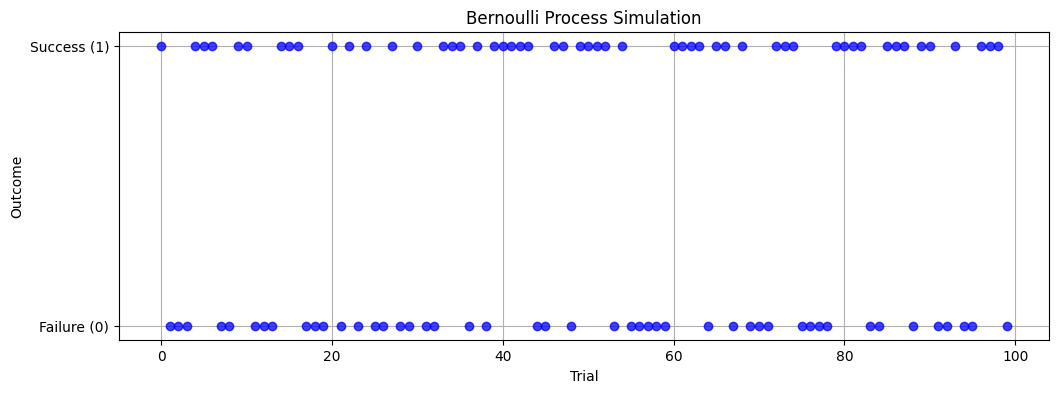

In [4]:
# Visualizing the Bernoulli process
plt.figure(figsize=(12, 4))
plt.plot(bernoulli_trials, drawstyle='steps-mid', marker='o', color='blue', alpha=0.75, linestyle='None')
plt.title('Bernoulli Process Simulation')
plt.xlabel('Trial')
plt.ylabel('Outcome')
plt.yticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.grid(True)
plt.show()

(c) Determine the probability of occurrence of the sample sequence obtained in part (b)

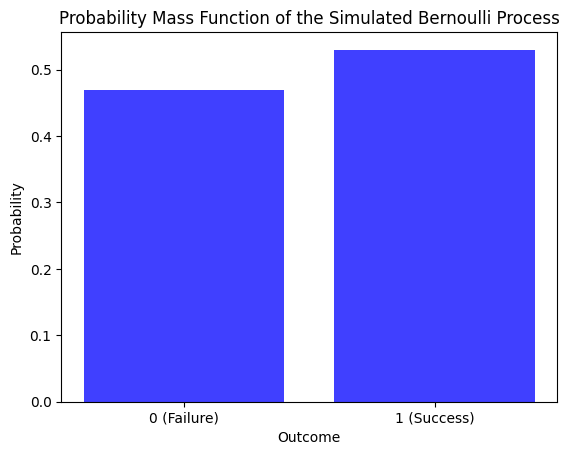

{1: 0.53, 0: 0.47}

In [5]:
# Count the frequency of each outcome in the simulated Bernoulli process
outcome_counts = Counter(bernoulli_trials)

# Calculate the probabilities for each outcome (0 and 1)
probabilities = {outcome: count / n for outcome, count in outcome_counts.items()}

# Visualizing the Probability Mass Function (PMF)
plt.bar(probabilities.keys(), probabilities.values(), color='blue', alpha=0.75)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('Probability Mass Function of the Simulated Bernoulli Process')
plt.xticks([0, 1], ['0 (Failure)', '1 (Success)'])
plt.show()

# Output the probabilities of each outcome
probabilities 

### Exercise 02

Let $Z_1, Z_2, ...$ be independent identically distributed random variables with $P(Z_n = 1) = p$ and $P(Z_n = -1) = q = 1 - p$ for all $n$. Let

$$
X_n = \sum_{i=1}^nZ_i, n = 1, 2, ...
$$

and $X_0 = 0$. The collection of random variables $\{X_n, n > 0\}$ is a stochastic process, and it is called the simple random walk $X_n$

(a) Describe the simple random walk $X_n$

Following the given definition, $X_n$ is a stochastic process. At each time $t$ in this process has the value that determined by the random variables (identically distributed random variables) $Z_i$ can taken value $1$ with probability $p$ and $-1$ with probability $1-p$ (we can see $Z_i$ is i.i.d. Bernoulli trial)

The outcome of this process is the cumulative sum of these random variables that can be represented as a path of moving steps (move up or down at each time $t$ depdent on the value of random variable $Z_i$)


Sửa:

$I = \{-n, -n + 1, ..., n-1, n\}$

$T = \{1, 2, 3, ...\}$

(b) Construct a typical sample sequence (or realization) of $X_n$

In [6]:
# Parameters for the simulation

## Probability that Z_n = 1
p = 0.4

# Number of steps in the random walk
n_steps = 4

In [7]:
# Generating the Z_n values (-1 or 1) based on the probability p
Z_values = np.random.choice([1, -1], size=n_steps, p=[p, 1-p])
Z_values

array([-1, -1,  1,  1])

In [8]:
# Constructing the random walk X_n
X_n = np.cumsum(Z_values)  # Cumulative sum of Z_values

In [9]:
# Adding X_0 = 0 at the beginning of the sequence
X_n = np.insert(X_n, 0, 0)
X_n

array([ 0, -1, -2, -1,  0])

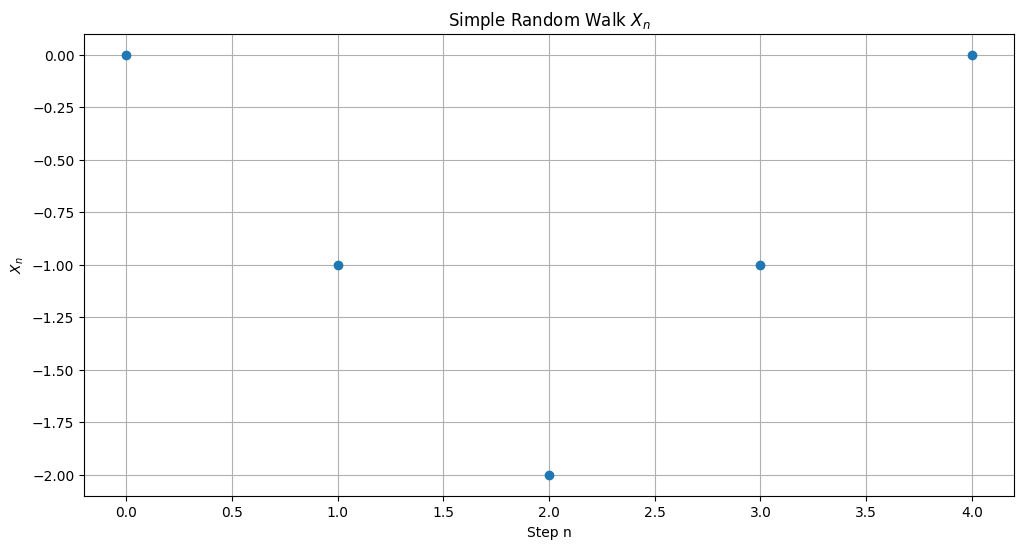

In [10]:
# Visualizing the simple random walk X_n
plt.figure(figsize=(12, 6))
plt.plot(X_n, marker='o', linestyle='None')
plt.title('Simple Random Walk $X_n$')
plt.xlabel('Step n')
plt.ylabel('$X_n$')
plt.grid(True)
plt.show()

(c) Derive the first-order probability distribution of the simple random walk $X_n$



Sửa:

$$
f_X(k) = P(X_n = k) = P(W_n = \frac{n+k}{2} = r) = C_n^r \cdot p^r \cdot (1-p)^{n-r}
$$

$n, k$ cùng chẵn cùng lẽ

(d) Find the probability that $X_n = -2$ after four steps

In [11]:
# Parameters for part (d)
n_steps_d = 4  # Number of steps
target_sum_d = -2  # Target sum after n steps

In [12]:
# For X_n = -2 in 4 steps, we need 1 successes (+1) and 3 failures (-1)
# Probability for getting success is p, so Probability for getting failure is 1 - p
# Number of successes required
num_minus_d = (n_steps_d - target_sum_d) // 2  
print(f"Number of success (+1) required (in any order in 4 steps) is {num_minus_d}")

Number of success (+1) required (in any order in 4 steps) is 3


In [13]:
# Probability that X_n = -2 after four steps
probability_Xn_minus2 = comb(4,3) * p * (1 - p)**3
print(f"Probability that X_n = -2 after four steps is: {probability_Xn_minus2}")

Probability that X_n = -2 after four steps is: 0.34559999999999996


(e) Find the mean and variance of the simple random walk $X_n$

Đặt:
$$
Y_i = \dfrac{Z_i + 1}{2}
$$

=> Suy ra $Y_i \in  \{0, 1\}$ => $Y_i$ là biến ngẫu nhiên Bernoulli.

=> $Z_i = 2 Y_i - 1$

So that:

$$
X_n = \sum_{i=1}^nZ_i = \sum_{i=1}^n(2 Y_i - 1) = 2\sum_{i=1}^nY_i - n
$$

Mean of the simple random walk $X_n$

$$
\mathbb{E}[X_n] = \mathbb{E}\left[2\sum_{i=1}^nY_i - n\right] = 2\sum_{i=1}^n\mathbb{E}[Y_i] - n = 2 pn - n = n(2p-1)
$$

Variance of the simple random walk $X_n$

$$
Var[X_n] = Var\left[2\sum_{i=1}^nY_i - n\right] = 4Var\left[\sum_{i=1}^nY_i\right] = 4 np (1-p)
$$

In [14]:
# Mean and Variance of the simple random walk X_n
mean_Xn = n_steps * (2 * p - 1)
variance_Xn = 4 *n_steps * p * (1 - p)
print(f"Mean and variance of the simple random walk X_n:\n\tMean = {mean_Xn}\n\tVariance = {variance_Xn}")

Mean and variance of the simple random walk X_n:
	Mean = -0.7999999999999998
	Variance = 3.84


(f) Find the autocorrelation function $R_X(n,m)$ of the simple random walk $X_n$

As the following lecture, we have the formulation of the autocorrelation function $R_X(n,m)$ as 

$$
R_X(n,m) = \mathbb{E}[X_n X_m]
$$

Sửa: Không mất tính tổng quát, giả sử $n \leq m$.

Trường hợp 1: $n = m$

$$
R_X(n,m) = \mathbb{E}[X_n^2] = Var[X_n] + E[X_n]^2 = 4npq + n^2(p-q)^2
$$

Trường hợp 2: $n < m$

Ta có: 

$$
X_m = \sum_{k=1}^mZ_k = \sum_{k=1}^nZ_k + \sum_{k=n+1}^mZ_k = X_n + sum_{k=n+1}^mZ_k
$$

Suy ra:

$$
X_n X_m = X_n^2 + \sum_{k=n+1}^mZ_kX_n
$$

Suy ra:

$$
\mathbb{E}[X_n X_m] = \mathbb{E}[X_n^2] + \sum_{k=n+1}^m\mathbb{E}[Z_k]\mathbb{E}[X_n] = 4npq + (m-n)(p-q)n(p-q) = 4npq + mn(p-q)^2
$$

Vậy 

$$
R_X(n,m) = 4.\min\{m, n\}pq + m.n(p-q)^2
$$

(g) Now let the random process $X(t)$ be defined by

$$
X(t) = X_n, n \leq t < n + 1
$$

Describe X(t). Construct a typical sample function of $X(t)$

$X(t)$ is a piecewise constant function (hàm hằng từng phần) that defined by the simple random walk $X_n$ with the constraint $n \leq t < n + 1$

In [15]:
def construct_xt(p, n_steps):
    # Parameters for the simulation

    ## Probability that Z_n = 1
    p = p

    # Number of steps in the random walk
    n_steps = n_steps
    
    # Generating the Z_n values (-1 or 1) based on the probability p
    Z_values = np.random.choice([1, -1], size=n_steps, p=[p, 1-p])
    
    # Constructing the random walk X_n
    X_n = np.cumsum(Z_values)  # Cumulative sum of Z_values
    
    # Adding X_0 = 0 at the beginning of the sequence
    X_n = np.insert(X_n, 0, 0)
    
    print(X_n)
    
    # Visualizing the simple random walk X_n
    plt.figure(figsize=(12, 6))
    
    
    plt.plot(X_n, marker='o', linestyle='None')
    
    for tau, state in enumerate(X_n):
        plt.hlines(y = state, xmin=tau, xmax=tau+1)
    
    plt.title('Simulation of $X_t$')
    plt.xlabel('Step n')
    plt.ylabel('$X_t$')
    plt.grid(True)
    plt.show()

[ 0  1  0 -1  0]


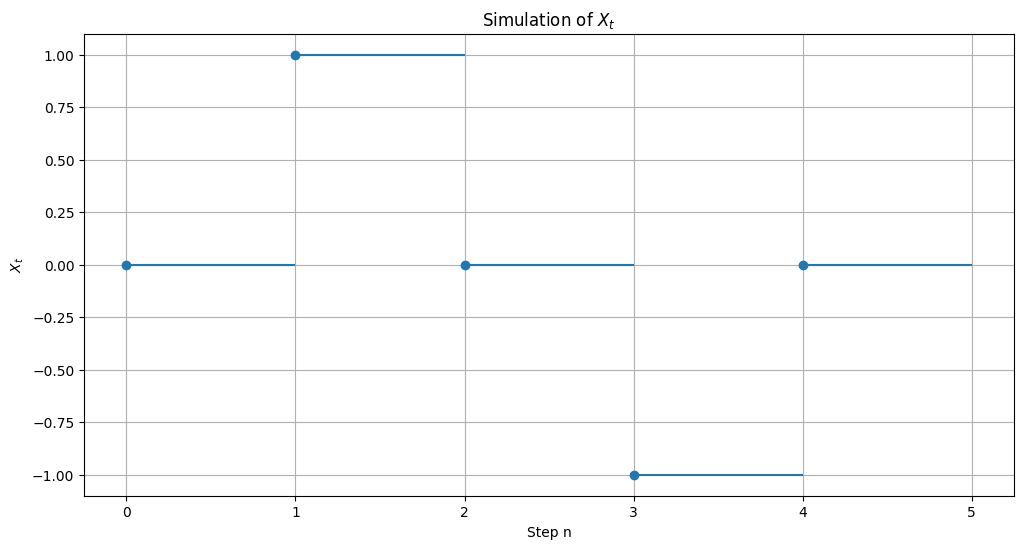

In [16]:
construct_xt(p=0.5, n_steps=4)

### Exercise 03

Consider a random process $X(t)$ defined by

$$
X(t) = Y\cos\omega t, t \geq 0
$$

where $\omega$ is a constant and $Y$ is a uniform random variable over $(0, 1)$.

(a) Describe $X(t)$

$I = [-Y, Y]$, do $cos(\omega t) \in [-1, 1]$

$T = [0, +\infty]$

(b) Sketch a few typical sample functions of $X(t)$

In [17]:
# Parameters for the simulation
omega = 2 * np.pi  # Set omega to 2π for a full cycle
t = np.linspace(0, 2*np.pi, 500)  # Time range for one full cycle

In [18]:
# Generate several values for Y uniformly distributed in (0, 1)
Y_values = np.random.uniform(0, 1, 10)  # 10 different values for Y

In [19]:
# Generating sample functions
sample_functions = [Y * np.cos(omega * t) for Y in Y_values]

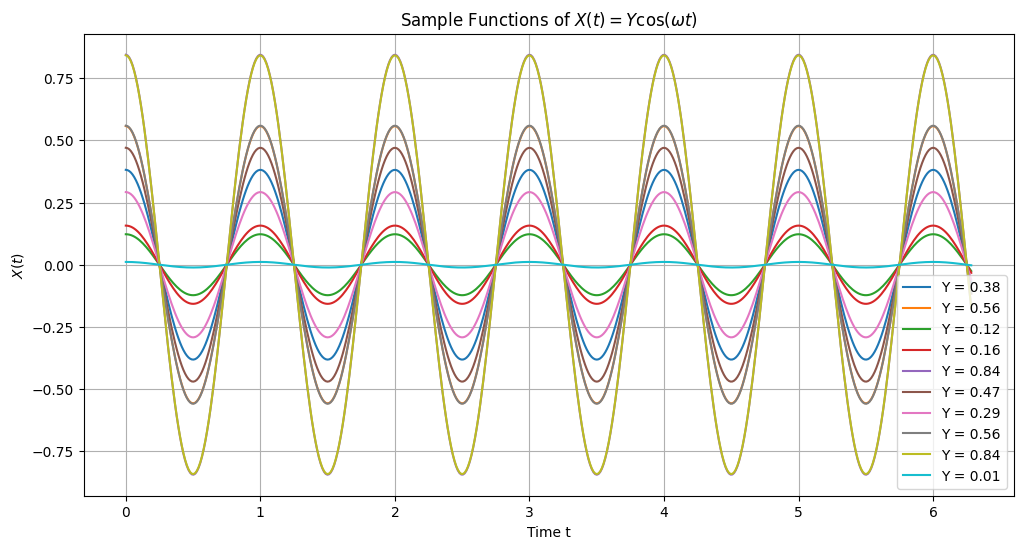

In [20]:
# Visualizing the sample functions
plt.figure(figsize=(12, 6))
for i, Y in enumerate(Y_values):
    plt.plot(t, sample_functions[i], label=f'Y = {Y:.2f}')

plt.title('Sample Functions of $X(t) = Y\cos(\omega t)$')
plt.xlabel('Time t')
plt.ylabel('$X(t)$')
plt.legend()
plt.grid(True)
plt.show()

(c) Find $\mathbb{E}[X(t)]$

Considering the continuous random variable $Y$ with probability density function is $f_Y(y)$, the expected value of a function $g(Y)$ given by:

$$
\mathbb{E}[g(Y)]= \int_{-\infty}^{+\infty}g(y)f_Y(y)dy
$$

In this case, $g(Y) = Y\cos\omega t, t \geq 0$ and $f_Y(y)$ is the pdf of the uniform distribtion $(0, 1)$. So:

$$
\mathbb{E}[X(t)] = \int_0^1 y\cos\omega t dy = \frac{1}{2}\cos(\omega t)
$$

In [21]:
# Define the symbol for Y
y = sp.symbols('y')

In [22]:
# Define omega and t as constants for this calculation
omega = 2 * sp.pi
t = sp.symbols('t', real=True)

In [23]:
# Define the function Y*cos(omega*t)
function = y * sp.cos(omega * t)

In [24]:
# Compute the expected value (integral over 0 to 1)
expected_value = sp.integrate(function, (y, 0, 1))

print(f"The expected value (integral over 0 to 1) E[X(t)] = {expected_value} if omega = {omega}")

The expected value (integral over 0 to 1) E[X(t)] = cos(2*pi*t)/2 if omega = 2*pi


(d) Find the autocorrelation function $R_X(t,s)$ of $X(t)$

As the following lecture, we have the formulation of the autocorrelation function $R_X(n,m)$ as 

$$
R_X(t,s) = \mathbb{E}[X_t X_s]
$$

with $X_t = Y\cos\omega t$ and $X_s =  Y\cos\omega s$, so that $X_tX_s = Y^2 \cos(\omega t)\cos(\omega s)$

$$
\mathbb{E}[X_t X_s] = \mathbb{E}[Y^2 \cos(\omega t)\cos(\omega s)] = \int_0^1 y^2\cos(\omega t)\cos(\omega s) dy = \frac{1}{3}\cos(\omega t)\cos(\omega s)
$$

In [25]:
# Define the symbol for Y
y = sp.symbols('y')

In [26]:
# Define omega, t and s as constants for this calculation
omega = 2 * sp.pi
t = sp.symbols('t', real=True)
s = sp.symbols('s', real=True)

In [27]:
# Define the function Y*cos(omega*t)
function = y * y * sp.cos(omega * t) * sp.cos(omega * s)

In [28]:
# Compute the expected value (integral over 0 to 1)
autocorrelation_function = sp.integrate(function, (y, 0, 1))

print(f"The autocorrelation function = {autocorrelation_function} if omega = {omega}")

The autocorrelation function = cos(2*pi*s)*cos(2*pi*t)/3 if omega = 2*pi


(e) Find the autocovariance function $K_X(t,s)$ of $X(t)$

Following the definition of autocovariance function, we have:

$$
K_X(t,s) = Cov[X_t,X_s] = \mathbb{E}{[X_t - \mu_X(t)][X_s - \mu_X(s)]} = R_X(t,s) - \mu_X(t)\mu_X(s)
$$

By using previous results, we have:

$$
K_X(t,s) = \frac{1}{3}\cos(\omega t)\cos(\omega s) - \frac{1}{4}\cos(\omega t)\cos(\omega s) = \frac{1}{12}\cos(\omega t)\cos(\omega s)
$$

### Exercise 04

Consider a discrete-parameter random process $X(n) = \{X_n, n \geq 1 \}$ where the $X_i$ is iid random variable with common cdf $F_X(x)$, mean $p$, and variance $\sigma^2$.

(a) Find the joint cdf of $X(n)$

Due to $X_i$ is iid random variable with common cdf $F_X(x)$, so the join cdf (cummulative distribued function) of $X(n)$ is

$$
F_X(x_1, x_2, ..., x_k; t_1, t_2, ..., t_k) = P(X(t_1) \leq x_1, X(t_2) \leq x_2, ..., X(t_k) \leq x_k) = F_X(x_1) \times F_X(x_2) \times ... \times F_X(x_k)
$$

(b) Find the mean of $X(n)$

Due to $X_i$ is iid random variable with common cdf $F_X(x)$, so the mean of $X(n)$
$$
\mathbb{E}[X(n)] = p
$$

(c) Find the autocorrelation function $R_X(m,n)$ of $X(n)$

$$
R_X(m,n) = \mathbb{E}[X_m,X_n] = \begin{cases}\mathbb{E}[X^2_n] = \sigma^2 + p^2,\text{ if } m = n\\ \mathbb{E}[X_m]\mathbb{E}[X_n]=p \cdot p = p^2, \text{ if } m \ne n\end{cases}
$$

(d) Find the autocovariance function $K_X(m,n)$ of $X(n)$

$$
K_X(m,n) = Cov[X_m,X_n] = \mathbb{E}{[X_t - \mu_X(t)][X_s - \mu_X(s)]} = R_X(t,s) - \mu_X(t)\mu_X(s) = \begin{cases} \sigma^2,\text{ if } m = n\\ 0, \text{ if } m \ne n\end{cases}
$$